# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráfico de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

Testando plotagens diferentes:

1: Um plot para cada variável:

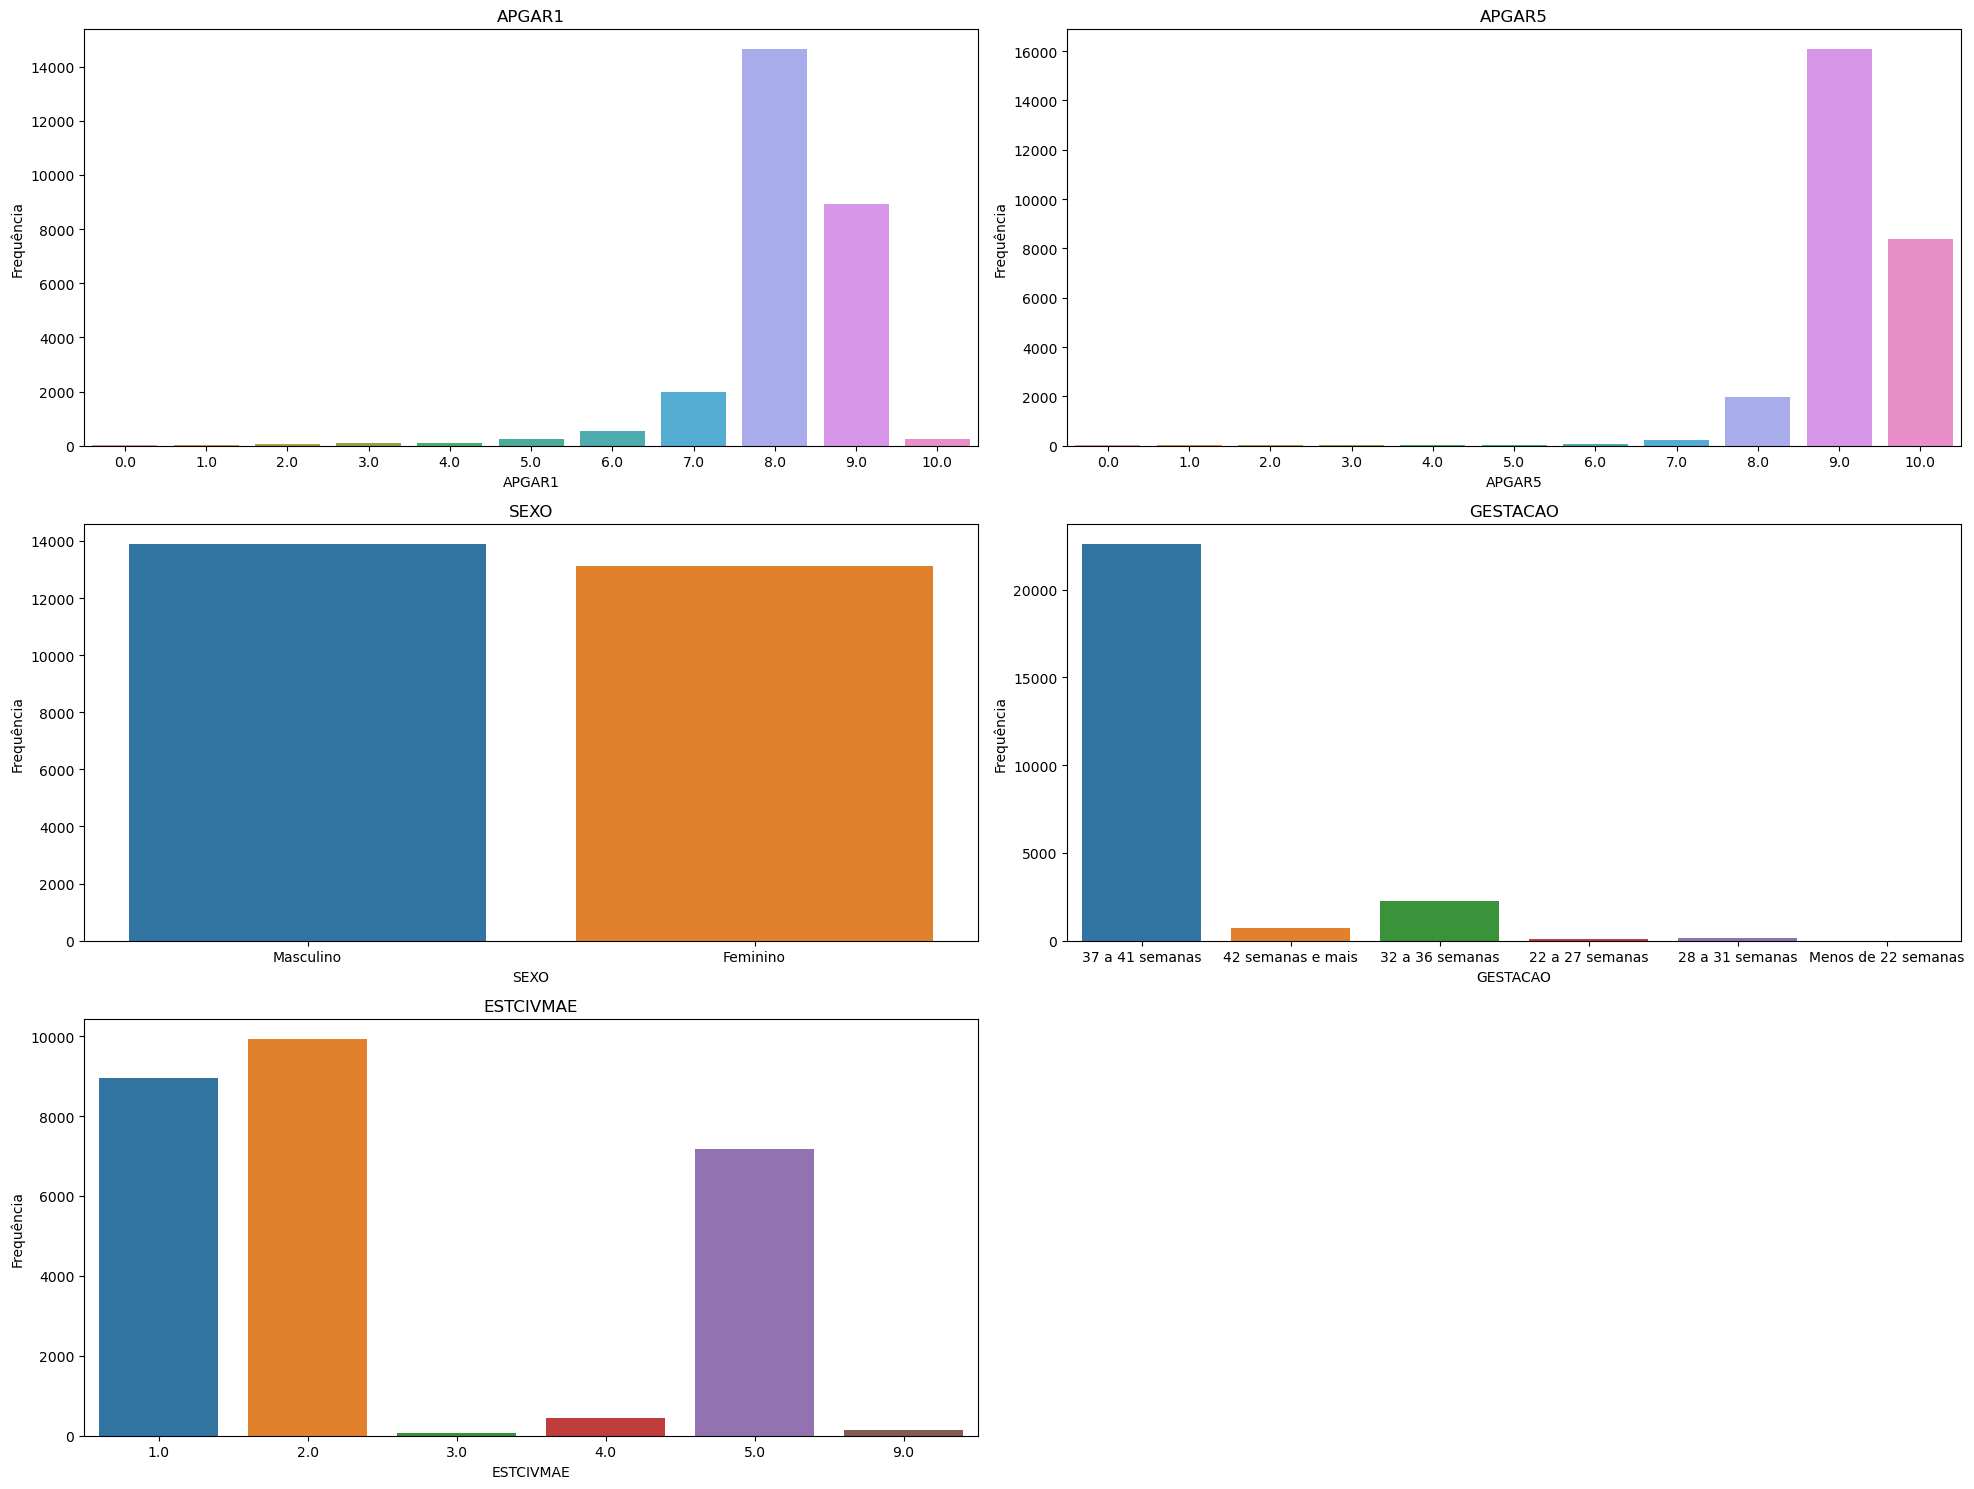

In [84]:
# Variáveis para plotar
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# Configurando o tamanho da figura:
plt.figure(figsize=(20, 15))

# Plotando cada variável como um gráfico de barras:
for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=sinasc, x=var)
    plt.title(f'{var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

# Ajustar o layout e mostrar o gráfico
plt.tight_layout()
plt.show()


2: Todos num mesmo gráfico:

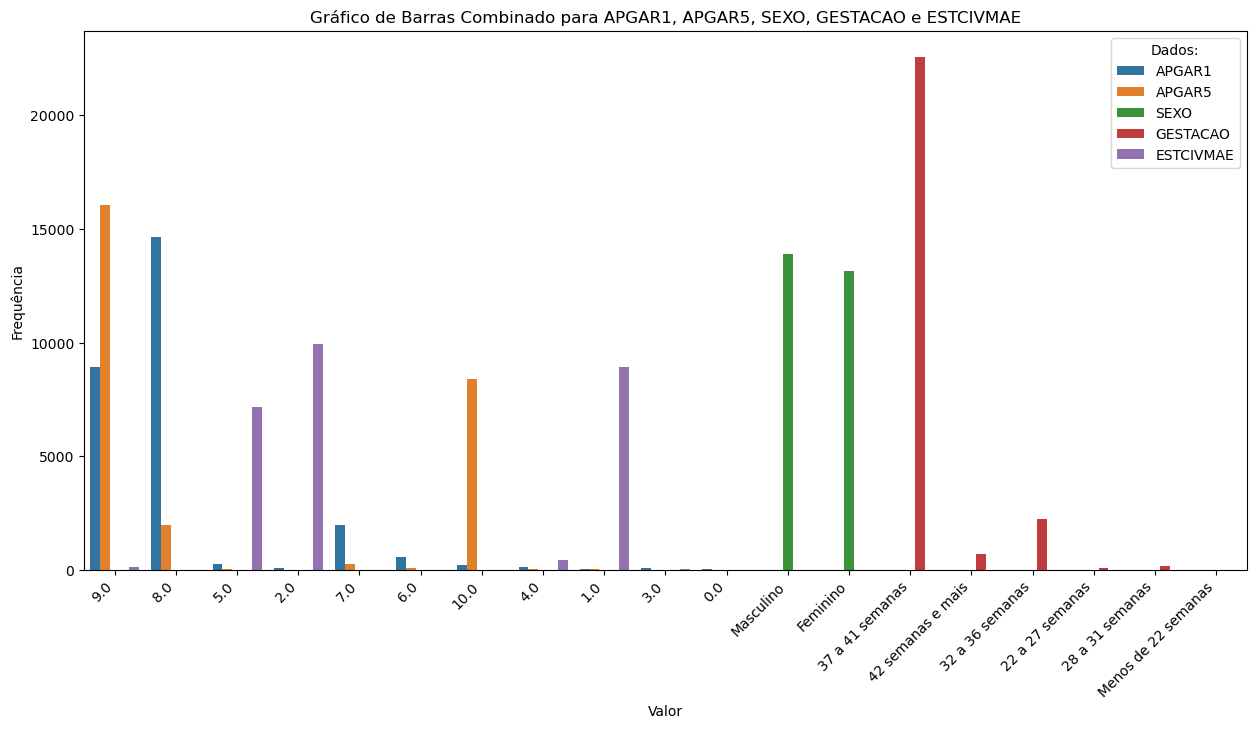

In [46]:

# Variáveis para plotar
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# Transformar os dados
sinasc_melted = sinasc[variaveis].melt(var_name='Dados:', value_name='Valor')

# Plotar o gráfico de barras
plt.figure(figsize=(15, 7))
sns.countplot(data=sinasc_melted, x='Valor', hue='Dados:')
plt.title('Gráfico de Barras Combinado para APGAR1, APGAR5, SEXO, GESTACAO e ESTCIVMAE')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.legend(title='Dados:')

# Ajustar a rotação dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

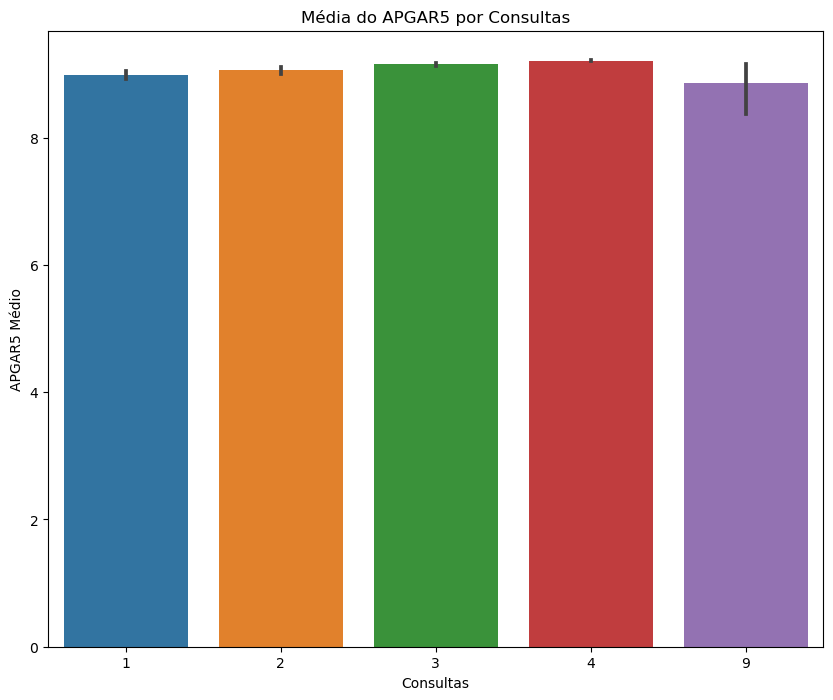

In [59]:
sns.barplot(x='CONSULTAS', y='APGAR5', data=sinasc)
plt.xlabel('Consultas')
plt.ylabel('APGAR5 Médio')
plt.title('Média do APGAR5 por Consultas')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

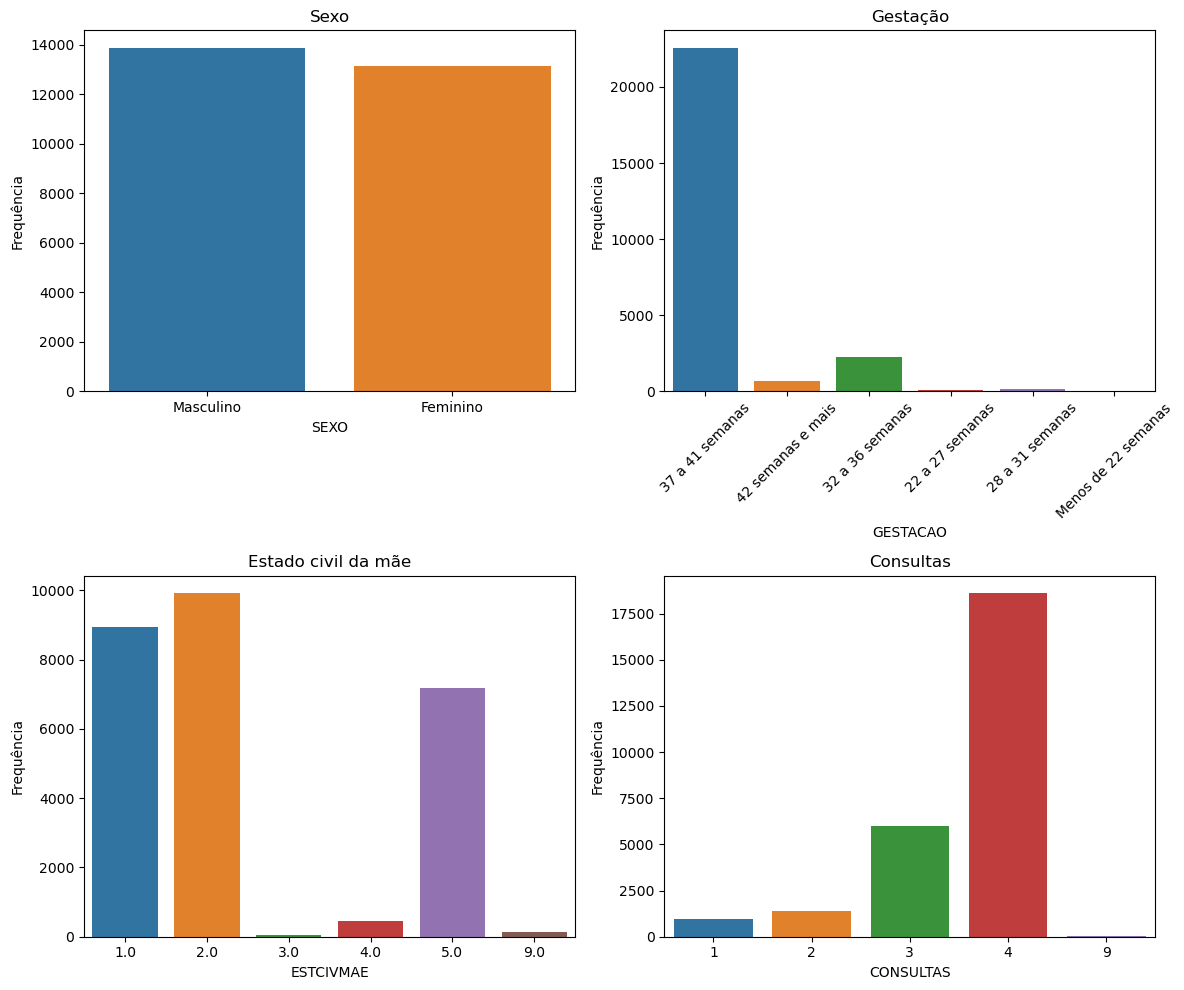

In [114]:
#Definindo o tamanho dos gráficos:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Gráfico de frequência de SEXO
sns.countplot(x='SEXO', data=sinasc, ax=axes[0, 0])
axes[0, 0].set_title('Sexo')
axes[0,0].set_ylabel('Frequência')

# Gráfico de frequência de GESTACAO com rotação dos rótulos
sns.countplot(x='GESTACAO', data=sinasc, ax=axes[0, 1])
axes[0, 1].set_title('Gestação')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotação dos rótulos do eixo x

# Gráfico de frequência de ESTCIVMAE
sns.countplot(x='ESTCIVMAE', data=sinasc, ax=axes[1, 0])
axes[1, 0].set_title('Estado civil da mãe')
axes[1,0].set_ylabel('Frequência')

# Gráfico de frequência de CONSULTAS
sns.countplot(x='CONSULTAS', data=sinasc, ax=axes[1, 1])
axes[1, 1].set_title('Consultas')
axes[1, 1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()
